# Classification

Classification is the supervised learning task of predicting the value of a categorical outcome ("class") variable, _y_, given real and/or categorical input ("feature") data, _X_. The objective of classification is to learn a model of the data that can be use to predict the correct class variable for new or unseen feature data.

A variety of classification algorithms exist. These algorithms have been developed under varying assumptions and employ different concepts. Each algorithm may interact with data differently based upon the size, dimensionality, and noise of the dataset, among other characteristics. These algorithms may have varying degrees of interpretability, variability, and bias.

Here, we'll use the scikit-learn (sklearn) package to expore the use of several classification algorithms. Let's fetch the Iris dataset from the UCI Machine Learning repository.

In [1]:
import numpy as np
import pandas as pd

fileURL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
data = pd.read_csv(fileURL, names=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Name'], header=None)

X = data.ix[:, :2]
y = data.ix[:, -1]

In [2]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(y)
y = le.transform(y)

## _k_-Nearest Neighbors

One of the simplest classification algorithms is the _k_-nearest neighbors algorithm. Let's import it from `sklearn`. We can call the method with several available inputs. Here, we specify the number of neighbors _k_ to consider.

In [3]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3)

Every classifier in `sklearn` has a `fit()` method. For a supervised learning algorithm, which learns to map features _X_ to classes _y_, we must input the corresponding _X_ and _y_ data.

In [4]:
clf.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

We call an algorithm fit (or parameterized) to input data a "model." Can now use the fitted model to predict the class _y_ given new features _X_.

Here, we'll simply see how well the classifier can predict the data on which it was fit. We can predict on feature data using the fitted model's `predict()` method, the output of which are corresponding class predictions:

In [5]:
y_pred = clf.predict(X)

We can compare the actual values, `y`, to the predicted values, `y_pred`. Here we compute the fraction of times that they match:

In [6]:
print(np.average(y == y_pred))

0.853333333333


Let's try visualizing the results. We can use another Python package, `matplotlib`, to generate these visualizations.

In [7]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
% matplotlib inline

In [8]:
h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

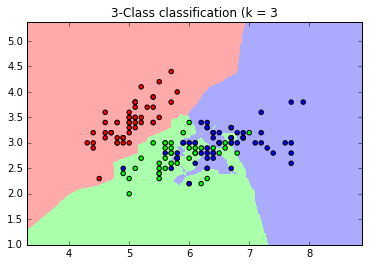

In [10]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X.ix[:, 0].min() - 1, X.ix[:, 0].max() + 1
y_min, y_max = X.ix[:, 1].min() - 1, X.ix[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X.ix[:, 0], X.ix[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = 3")

## Housing Dataset

Let's practice applying what we've learned to a house price dataset for Ames, Iowa.

In [50]:
df_houses = pd.read_excel('http://www.amstat.org/publications/jse/v19n3/decock/AmesHousing.xls')
print(df_houses.head())

   Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL           141     31770   Pave   
1      2  526350040           20        RH            80     11622   Pave   
2      3  526351010           20        RL            81     14267   Pave   
3      4  526353030           20        RL            93     11160   Pave   
4      5  527105010           60        RL            74     13830   Pave   

  Alley Lot Shape Land Contour    ...     Pool Area Pool QC  Fence  \
0   NaN       IR1          Lvl    ...             0     NaN    NaN   
1   NaN       Reg          Lvl    ...             0     NaN  MnPrv   
2   NaN       IR1          Lvl    ...             0     NaN    NaN   
3   NaN       Reg          Lvl    ...             0     NaN    NaN   
4   NaN       IR1          Lvl    ...             0     NaN  MnPrv   

  Misc Feature Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice  
0          NaN        0       5    20

In [51]:
X = df_houses.ix[:, :-1]
y = df_houses.ix[:, -1]

### 1. Transform the features to dummy variables.

In [52]:
# Code goes here.

### 2. Bin the SalePrice into two outcomes, 'high' or 'low'.

In [45]:
# Code goes here.

### 3. Train a 5-nearest neighbors classifier and use it to predict the binned sales price.

In [46]:
# Code goes here.